<a id='top'></a>

# CSCI3022 S21
# Homework 5: Testing and Confidence
***

**Name**: Abeal Sileshi

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.stats.api as sms
import scipy.stats as stats
import math
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [15 points] Problem 1 - Time and Testing 

The flowers bloomed early this year in Kyoto, Japan (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

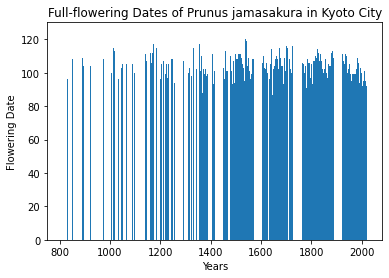

In [37]:
df=pd.read_csv('kyotoflowers.csv', encoding='UTF-8')

str = "Full-flowering date (DOY)"

y= df.loc[:,str]
x = df.AD

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Years')
plt.ylabel('Flowering Date')
plt.title('Full-flowering Dates of Prunus jamasakura in Kyoto City')
plt.show()


**Part A ANSWER:** The data appears uniformally distributed. Also I'm assuming the spaces between years represents years with NaN

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

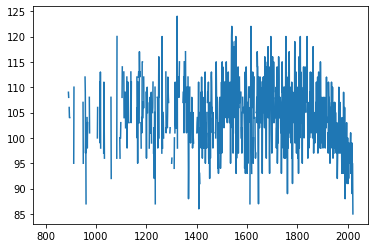

In [38]:
str = "Full-flowering date (DOY)"

y= df.loc[:,str]

fig = plt.figure()
ax = plt.axes()

x = df.AD
ax.plot(x, y);


**Part B ANSWER:** There appears to be a downward trend in the last 150 years from looking at the graph

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [39]:
#y is the full flowering dates column
y.describe()

count    833.000000
mean     104.453782
std        6.476146
min       85.000000
25%      100.000000
50%      104.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?  One way to do this might be to generate confidence intervals comparing e.g. the last $n$ years of data to all the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of take, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior all-observed years.

Write a sentence interpreting this result.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in any variance/confidence/etc. calculations.

In [40]:
array = [90]

y2 = y.iloc[0:1208] #all the years except the last 12 years

index = 0;
for item in y:
    if index >= 1208:
        array.append(item)
    index += 1

arr = array[1:] ## array is the last 12 years
def Average(lst):
    return sum(lst) / len(lst)

avg = Average(arr); #average for 2010-2021
print("average of 2010-2021 is ", avg)

stats.ttest_ind(y2,arr, nan_policy = 'omit') #testing whether or not the means are the same

average of 2010-2021 is  94.23076923076923


Ttest_indResult(statistic=5.849941974382689, pvalue=7.06862866201251e-09)

**Part D ANSWER:** Since the p-value is so small we can reject that the mean from the past 12 years is equivalent to the mean of the years up to the last 12 years.

**Part E**: Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

**Part E ANSWER:** No the test in part D is not appropriate because this test is only tells us that the means are surely not the same, however we don't know the reason why. There could be another underlying variable that affects the full flowering date.

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years in the data set, starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of every starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1629 to 2010-2021 contains zero, then print `1618`.  Report:
- The earliest date of such an interval contianing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [41]:
step = 12
y3 = y.iloc[800:1208] #1600 through 2010
y3 = y3.dropna() 
#arr is the most recent 12 years

len(y3)
#389 is the length of our array y3

count = 0
for x in range(0, 389):
    if(x+12 < 389): #to check that we don't go out of bounds
        temp = y3[x:x+step]
        cm = sms.CompareMeans(sms.DescrStatsW(temp), sms.DescrStatsW(arr))
        val1, val2 = cm.tconfint_diff(usevar = 'unequal') #gets confidence intervals
        check = val2 - val1 #check is the upper bound minus the lower bound
        #print(check)
        if(check > val2): #if check is greater than val2 then val1 was a negative number which means that the interval contains zero
            if(count == 1):
                print("the first time")
            count = count +1
            print(y3[x:x+step])
            
print(count)

1178     97.0
1179    102.0
1180     99.0
1181     93.0
1182     99.0
1183    109.0
1184     99.0
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
Name: Full-flowering date (DOY), dtype: float64
the first time
1179    102.0
1180     99.0
1181     93.0
1182     99.0
1183    109.0
1184     99.0
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
Name: Full-flowering date (DOY), dtype: float64
1180     99.0
1181     93.0
1182     99.0
1183    109.0
1184     99.0
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
Name: Full-flowering date (DOY), dtype: float64
1181     93.0
1182     99.0
1183    109.0
1184     99.0
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
1192     97.0
Name: Full-flowering date (DOY), dtype: float64
1182     99.0
1183    109.0
1184     99.0
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     

**Part E ANSWER:**
- The first occurence is in 1178 + 801 = 1979 
- The latest date that doesn't contain a zero is 2008, more precisely the interval from 1996 to 2008. Furthermore, 12 year intervals can't be created after 2008 since the latest date in our dataset is 2021

Every confidence interval from the 12 year list from the 1600s until 1979 does not contain zero. Which means the means ARE different from 2010-2021. But suddenly all the confidence intervals from 1979 onwards start containing zero, meaning they COULD be the same. This suggests the flower dates are getting earlier.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (5 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**Part A ANSWER:** Basically, a lot of research and business policy decisions are based on whether or not a p-value is below a certain threshold, such as p = .05. The problem here is, a lot of times .05 isn't even low enough. A lot of research published with .05 p-values aren't even necessarily valid. I agree with the suggestions in  the research paper. I would want to see this threshold lowered to .005.

#### 2B  (2 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

**Part B ANSWER:** A 99% confidence interval is wider than a 95% confidence interval. I would tell my younger sibling, that if you want to be more sure, you have to widen the range of possible values.


#### 2C (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

**Part C ANSWER:** I would rather have a low Type 2 error rate. Because with the type 2 error rate the strength of the carbon would be below tolerance, which is dangerous, but we wouldn't be able to detect this fact. While with the type 1 error, you think the carbon is not OK when it really is, which at the end of the day doesn't hurt anyone.

#### 2D (2pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for $\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.

Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

**Part D ANSWER:** It is equal to .95 because of the definition of confidence intervals. 95% confidence interval does not mean there's a 95 percent chance that our obs is in this interval. In 90 percent of all confidence intervals our obs is in the interval.

#### 2E (2pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval
for the *true* proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

In [42]:
#14/91 = .153 the mean
stats.norm.interval(0.95, loc=.153, scale=.05)

print("In 90% of all confidence intervals, the true proportion is between .05 and .25")

In 90% of all confidence intervals, the true proportion is between .05 and .25


#### 2F (2pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7400
meters. Inspecting their study and the descriptions of their 64 measurements, it is reasonable to assume that the data were iid.  Their measurements contained sample statistics in $\mu s$ (or $\frac{sec}{10^6}$) of **mean** $\bar{X}=27.75$ and **standard deviation** of $s = 5.08.$


Construct an approximate 95% confidence interval for the time light takes to travel 7400 meters.

In [43]:
up = 27.75+1.96*(5.08/math.sqrt(64))
low = 27.75-1.96*(5.08/math.sqrt(64))

print("The confidence interval is (", low, ")", ",","(", up, ")")

The confidence interval is ( 26.5054 ) , ( 28.9946 )


---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3 - Nap time?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

1)
- The coffee+nap confidence interval is (443.063, 459.537)
- The coffee confidence interval is (483.975, 504.425)
- The nap confidence interval is (481.129, 504.471)
- In conclusion, it appears as if the coffee+nap combination is better for faster reaction times.

2)
- We use a t-distribution because these sample sizes are small, less than 30.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.



In [44]:
#the null hypothesis is that the difference in the means is zero
#the alt hyp is that naps mean is greater than coffee

t = (494.2 - 492.8)/((39.6**2)/15 +(45.2**2)/15)
print(t)

print("since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero")


0.005815241470979081
since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero


**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

In [45]:
# coffee-nap versus coffee
#the null hypothesis is that the difference in the means is zero
#the alt hyp is that coffee-naps mean is greater than coffee

t = (494.2 - 451.3)/((39.6**2)/15 +(31.9**2)/15)
print(t)

print("since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero")

0.24886204109414203
since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero


In [46]:
# coffee-nap versus nap
#the null hypothesis is that the difference in the means is zero
#the alt hyp is that coffee-naps mean is greater than nap

t = (492.8 - 451.3)/((45.2**2)/15 +(31.9**2)/15)
print(t)

print("since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero")

0.2033881691797494
since our t gives us a pval greater than our threshold we reject the null that the difference in means is zero


**Part D**: Generally speaking, we ust $\alpha$ to denote the "probability of error if the null hypothesis is true."  In parts B-C, we performed three hypothesis tests.  Suppost that each of these tests is **independent**, with underlying Probability of type I error of $\alpha=0.025$.  What's the probability that we committed *at least one* Type I error over those 3 tests?  Why might this be important?

In [19]:
prob = (.975)**3
print("the probability of committing at least one type 1 error is", prob)

the probability of committing at least one type 1 error is 0.9268593749999999
